## Regularised Logisitic Regression 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

<h3>Map Features</h3>

In [68]:
def mapfeature(X1,X2):
    degree=6
    out=np.ones((m,1))
    for i in range(1,degree+1):
        for j in range(i+1):
            out=np.hstack((out,(np.power(X1,i-j) * np.power(X2,j))[:,np.newaxis]))
    return out

<h3>Sigmoid Function</h3>

In [69]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

<h3>Cost Function</h3>

In [70]:
def costfunction(theta,X,y,l):
    ghx=sigmoid(X @ theta)
    tosum=(y * np.log(ghx)) + ((1 - y) * np.log(1-ghx))
    J=(-1/m)* np.sum(tosum)
    reg=(l/(2*m))* (theta[:1].T @ theta[:1])
    J=J + reg
    return J

### Gradient

In [71]:
def gradient(theta,X,y,l):
    grad=np.zeros((n,1))
    grad=(X.T @ (sigmoid(X @ theta)-y))/m
    reg=(l/m) * theta
    # since we dont consider theta[0]
    reg[0]=0
    grad=grad +reg
    return grad

In [72]:
data=pd.read_csv("ex2data2.txt",header=None)

In [73]:
X=data.iloc[:,0:2]
X.head()

,0,1
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [74]:
y=data.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 2, dtype: int64

In [75]:
y=y[:,np.newaxis]
m=len(y)
mask=y==1
m

118

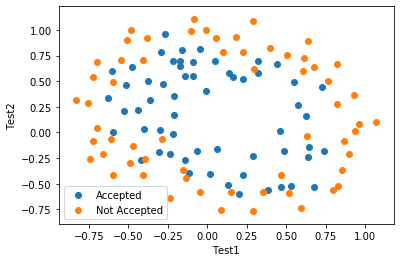

In [76]:
%matplotlib inline
accepted=plt.scatter(X[mask][0],X[mask][1])
notaccepted=plt.scatter(X[~mask][0],X[~mask][1])
plt.xlabel("Test1")
plt.ylabel("Test2")
plt.legend((accepted,notaccepted),('Accepted','Not Accepted'))

In [77]:
# mapping
X=mapfeature(X.iloc[:,0],X.iloc[:,1])
(m,n)=X.shape
print((m,n))

(118, 28)


In [78]:
theta=np.zeros((n,1))
# l=0 overfitting
l=1
J=costfunction(theta,X,y,l)
print(J)

[[0.69314718]]


In [79]:
temp=opt.fmin_tnc(func=costfunction,x0=theta.flatten(),fprime=gradient,args=(X,y.flatten(),l))
thetaopt=temp[0]
pred = [sigmoid(np.dot(X, thetaopt)) >= 0.5]
print(np.mean(pred == y.flatten()) * 100)


83.05084745762711


In [80]:
temp[0]


array([ 1.27422052,  0.62478653,  1.18590382, -2.02173848, -0.91708238,
       -1.41319218,  0.12444389, -0.36770505, -0.36458177, -0.18067775,
       -1.46506521, -0.06288686, -0.61999795, -0.27174425, -1.20129301,
       -0.23663779, -0.20901429, -0.05490404, -0.27804401, -0.29276911,
       -0.4679072 , -1.04396487,  0.02082853, -0.29638539,  0.00961564,
       -0.32917181, -0.13804205, -0.935508  ])

### Mapforplot

In [81]:
def mapforplot(X1,X2):
    degree=6
    # since it will be 1 by features dim
    out=np.ones((1))
    for i in range(1,degree+1):
        for j in range(i+1):
            out=np.hstack((out,(np.power(X1,i-j) * np.power(X2,j))))
    return out

### Decision Boundary

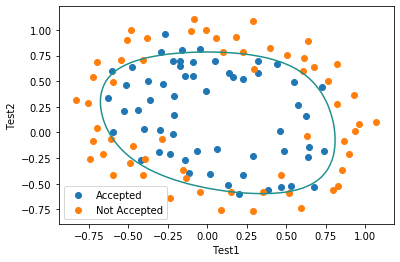

In [82]:
# The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values
# parameters in the range of X1 and X2
u=np.linspace(min(X[:,1]),max(X[:,1]),50)
v=np.linspace(min(X[:,2]),max(X[:,2]),50)
# since 50 features
# to store predicted
z=np.zeros((50,50))
for i in range(50):
    for j in range(50):
        # as features are more need to map
        # return 1 * 28 feature each time for each u and v X * theta
        z[i,j]=np.dot(mapforplot(u[i],v[j]),thetaopt)
        

m=len(y)
mask=y==1
X=data.iloc[:,0:2]
accepted=plt.scatter(X[mask][0],X[mask][1])
notaccepted=plt.scatter(X[~mask][0],X[~mask][1])
# u v are range of X1 and X2
plt.contour(u,v,z,0)
plt.xlabel("Test1")
plt.ylabel("Test2")
plt.legend((accepted,notaccepted),('Accepted','Not Accepted'))
